# Verizon Practice Center Project Exercise - Pankaj Patel

In [769]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import pandas as pd

In [770]:
#load up the muncipal boundary data into GeoDataFrame
boundary_link = '/Users/pankajpatel/Desktop/tampa_area/Municipal_Boundary.shp'
boundary = gpd.read_file(boundary_link)

In [771]:
boundary.head()

,OBJECTID,NAME,LOCALFIPS,LASTUPDATE,LASTEDITOR,CODE,SHAPESTAre,SHAPESTLen,MUNITYP,MUNIAREA,GlobalID,geometry
0,6,Temple Terrace,71400,2019-07-15T20:49:38.000Z,WILLIAMSDU,R,2.113201e+08,1.931536e+05,City,7.567883,{AD9DB0D1-0C99-4BC9-87B2-03DAB8BB7AA7},(POLYGON ((-82.36608418363654 28.0691574739733...
1,5,Plant City,57550,2019-04-24T12:30:37.000Z,RADULSKIJ,P,7.947148e+08,5.139521e+05,City,28.002316,{EF3F13C5-33AD-4383-AAD5-8E8EA7181335},POLYGON ((-82.06383672529697 27.99412997094485...
2,4,Tampa,71000,2019-06-24T18:18:27.000Z,DPD3,T,3.279721e+09,1.029847e+06,City,117.357552,{377536EA-1162-4CFD-960A-AB3D06509CAA},(POLYGON ((-82.27893393780498 28.1713029019601...


In [772]:
#load up the road tiger data into GeoDataFrame
tiger = '/Users/pankajpatel/Desktop/tl_2019_12057_roads/tl_2019_12057_roads.shp'
road_tiger = gpd.read_file(tiger)

In [773]:
road_tiger.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110510088139,Conley Ave Exd,M,S1400,"LINESTRING (-82.482056 27.88072299999999, -82...."
1,110510084316,Casey Rd Exn,M,S1400,"LINESTRING (-82.52162899999999 28.09196, -82.5..."
2,110510084347,Cedar Rd Exn,M,S1400,"LINESTRING (-82.469824 27.716595, -82.46990999..."
3,1109076031599,Indigo Trl Lp,M,S1400,LINESTRING (-82.35268399999998 27.878858999999...
4,1103700280852,Turtle Xing Lp,M,S1400,LINESTRING (-82.54296499999998 28.092110999999...


In [774]:
print("CRS for polygon_area :",boundary.crs) 
print("CRS for road tiger :",road_tiger.crs)

CRS for polygon_area : {'init': 'epsg:4326'}
CRS for road tiger : {'init': 'epsg:4269'}


In [775]:
#Converting CRS to a different format
#pre-requisite to conduct spatial operations between the layers (as their coordinates need to match)
#NAD83(HARN) / Florida West (epsg=2778)
boundary=boundary.to_crs(epsg='2778')
road_tiger=road_tiger.to_crs(epsg='2778')

In [776]:
#area of shapely polygon
for i in range(0,boundary.shape[0]):
    print("The area of",boundary['NAME'][i],'is',boundary['geometry'][i].area,'sq meters')

The area of Temple Terrace is 19632365.56218899 sq meters
The area of Plant City is 73831750.7343567 sq meters
The area of Tampa is 304697394.53571856 sq meters


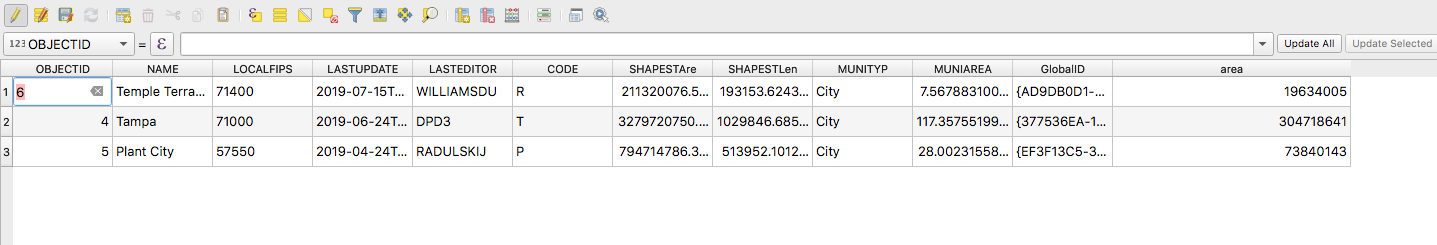

In [777]:
#area reported from QGIS
from IPython.core.display import Image 
Image('/Users/pankajpatel/Desktop/Calculate Area.png')

In [778]:
#new column 'Length'
road_tiger['Length']=road_tiger.length
road_tiger.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,Length
0,110510088139,Conley Ave Exd,M,S1400,LINESTRING (152534.438530447 393085.0425631172...,62.637694
1,110510084316,Casey Rd Exn,M,S1400,LINESTRING (148737.8392813377 416509.294855876...,446.681907
2,110510084347,Cedar Rd Exn,M,S1400,LINESTRING (153669.3224977693 374893.042434193...,32.256929
3,1109076031599,Indigo Trl Lp,M,S1400,LINESTRING (165272.5437017072 392835.093976541...,55.057695
4,1103700280852,Turtle Xing Lp,M,S1400,LINESTRING (146641.1220679237 416535.201374220...,67.624957


In [779]:
#Total road coverage in Tampa
#using intersection()
road_TPA = 0
for i,row in road_tiger.iterrows():
    lstring = row[4]
    poly = boundary.iloc[2]['geometry']
    if (poly.intersection(lstring).length > 0):
        road_TPA += poly.intersection(lstring).length
print("The road coverage in meters per polygon(Tampa) is :",road_TPA )

The road coverage in meters per polygon(Tampa) is : 3281533.366150756


In [780]:
#Total road coverage in Temple Terrace
#using intersection()
road_TT = 0
for i,row in road_tiger.iterrows():
    lstring = row[4]
    poly = boundary.iloc[0]['geometry']
    if (poly.intersection(lstring).length > 0):
        road_TT += poly.intersection(lstring).length
print("The road coverage in meters per polygon(Temple Terrace) is :",road_TT)

The road coverage in meters per polygon(Temple Terrace) is : 195318.7141365207


In [781]:
#Total road coverage in Plant City
#Using intersection
road_PC = 0
for i,row in road_tiger.iterrows():
    lstring = row[4]
    poly = boundary.iloc[1]['geometry']
    if (poly.intersection(lstring).length > 0):
        
        road_PC += poly.intersection(lstring).length
print("The road coverage in meters per polygon(Plant City) is :",road_PC)

The road coverage in meters per polygon(Plant City) is : 462557.39496248413


## Road coverage in miles per polygon

In [782]:
meters = {"Tampa": road_TPA,"Temple Terrace":road_TT,"Plant City":road_PC}
conversion = 0.621371
for key,value in meters.items():
    miles = value*.001* conversion
    #print('The road coverage in ', key,' is equal to ',miles,' miles')
    print('The road coverage in',key,'is {:.3f} miles'.format(miles))

The road coverage in Tampa is 2039.050 miles
The road coverage in Temple Terrace is 121.365 miles
The road coverage in Plant City is 287.420 miles


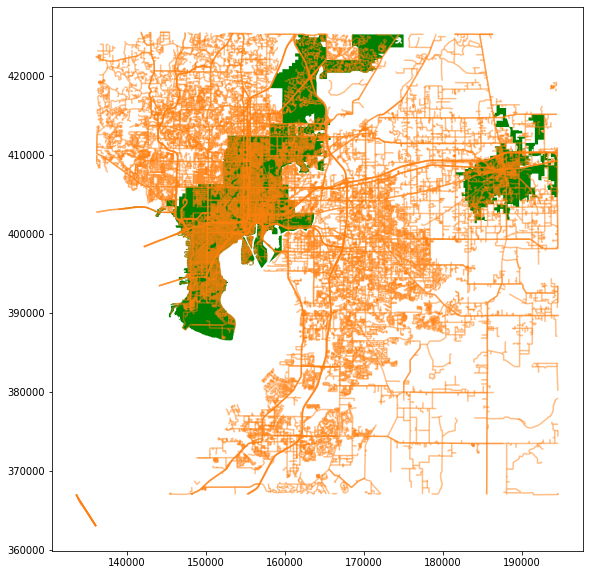

In [783]:
ax = road_tiger.plot(color='C1',figsize=(15,10), alpha=0.5)
#plt.subplots(figsize=(18,5))
boundary.plot(ax=ax,color='g',markersize=5)

## Additional Insights:

#### 1. The above plot shows cities and their respective road coverages. It can be observed that the cities have a dense road coverage in their centers as compared to their boundaries.
#### 2. It is likely to commute in a much easier way at the city centers due to the abundance of roads.
#### 3. I noticed that the area of the polygon is directly proportional to road coverage per polygon. With increase in area, it is expected              that there would be an increase in the road coverage.